## Matplotlib 3D fra forskellige vinkler

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function f(x, y) - change this as needed
def f(x, y):
    return x**2 + y**2  # Example function

# Create a meshgrid for plotting
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Apply the boundary conditions
Z[(Y < 0) | (X**2 + Y**2 > 4)] = np.nan


# Loop through a range of azimuth angles
for angle in range(0, 360, 45):  # Adjust range and step as needed
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')

    # Set the view angle
    ax.view_init(30, angle)  # 30 is the elevation angle, angle is the azimuth

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title(f'3D plot at azimuth angle {angle} degrees')

    plt.show()


## Sympy + Matplotlib "heatmap"

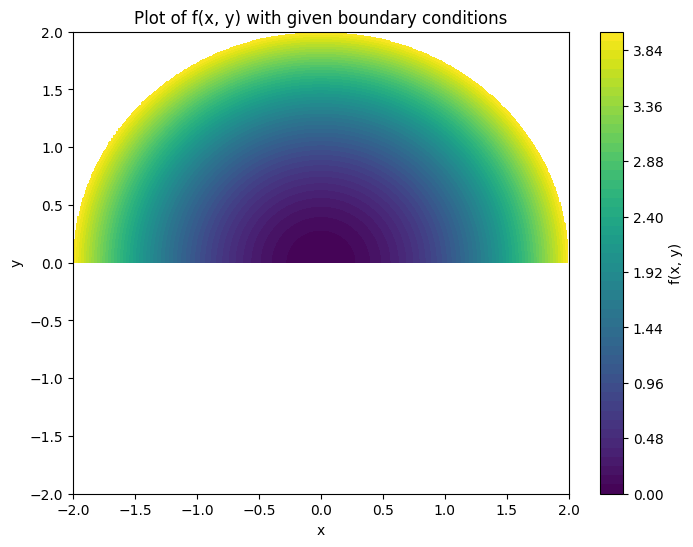

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the variables
x, y = sp.symbols('x y')

# Define your function here, for example f(x, y) = x**2 + y**2
f = x**2 + y**2

# Create a meshgrid for plotting
x_vals = np.linspace(-2, 2, 400)  # Adjust range and density as needed
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Convert the sympy function to a numpy-compatible function
f_lambdified = sp.lambdify((x, y), f, "numpy")

# Apply the boundary conditions
F = np.where((Y >= 0) & (X**2 + Y**2 <= 4), f_lambdified(X, Y), np.nan)

# Plot the function
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, F, levels=50, cmap='viridis')  # You can change the colormap
plt.colorbar(label='f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of f(x, y) with given boundary conditions')
plt.show()